# Project: Investigate TMDb Movie DataSet

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

 TMDb Movie dataset from [kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata) to investigate.It contains 10,000 movie data having information including user rating, budget, revenue, date of release, genres and much more information.
 ## The potential problem that can be observe from the dataset.    
 
 
  1)In which year the most number of movies release.  
  2)In which movie had largest and lowest budget.  
  3)In Which movie had most profit and loss.  
  4)Number of movie release every year.  
  5)Which movie had largest and shortest runtime.  
  6)Average budget of the movie.   
  7)Average revenue earned by the movie.  
  8)Average runtime of the movie using Box-Model.  
  9)Average duration of the movie.   

In [4]:

# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> To analyse the dataset and find coloumn which is neccessary to answer the proposed question and delete the unused data for easy calculation and understandable.   

### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [6]:
df.tail(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
#To find number of rows and column
df.shape

(10866, 21)

### Find the basic information  about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

   After observation of the data set , we know that total number of coloumn is 21 and total 10866 entries in the      dataset.There are many null value present in the column cast,genres, production_companies, tagline,director,homepage. So removed the unused coloumn.

In [8]:
#To know overview of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

### 1.Removed unused column

In [7]:
delete_column=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview',
         'production_companies', 'vote_count', 'vote_average']
#delete the coulmn
df= df.drop(delete_column,1)
#preview after removing the column
df.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


### 2. Removing the duplicacy in the rows(if any).

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
row,col = df.shape
#Now 
print('{} total entries of movies and {} no.of columns in it.'.format(row-1, col))

10865 total entries of movies and 10 no.of columns in it.


In [11]:
df.drop_duplicates(inplace=True)

### 3. Removing 0's from budget and the revenue column

In [8]:
df_budget = df.query('budget == 0')

df_budget.head(1)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
30,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,The man behind the myth,103,Mystery|Drama,6/19/15,2015


In [13]:
#Number of movie having budget 0
row,col = df_budget.shape
print('Number of movie having 0 budget is {}.'.format(row-1))

Number of movie having 0 budget is 5695.


In [12]:
#create separate list of column
temp_list = ['budget','revenue']

# To replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NAN value in the temp_list
df.dropna(subset=temp_list, inplace=True)

row ,col = df.shape
print('After removing such entries, we have only {} no. of movies.'.format(row-1))

After removing such entries, we have only 3854 no. of movies.


In [13]:
#Change the date fromat of the release_date
df.release_date = pd.to_datetime(df['release_date'])

In [14]:
#Check the new format of release_date
df.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


In [15]:
#replace 0 with NAN of runtime column in the dataset
df['runtime']=df['runtime'].replace(0, np.NAN)
#check the current format of column
df.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [16]:
#change the datatype of budget and revenue
change = ['budget','revenue']
df[change]=df[change].applymap(np.int64)
#check the new format of column
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [17]:
df.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


#### New dataset having date change.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Profit of Each Movie

In [18]:
#In Which movie had most profit and loss
df.insert(2,'profit',df['revenue']-df['budget'])
df.head()

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [19]:
import pprint
# define the function to calculate each of the research question
def calculate(column):
    # High earn profit
    
    high = df[column].idxmax()
    high_detail = pd.DataFrame(df.loc[high])
    
    # Low earn profit
    
    low = df[column].idxmin()
    low_detail = pd.DataFrame(df.loc[low])
    
    #collect data at one place
    info = pd.concat([high_detail,low_detail],axis = 1)
    return info
#call the function to get result
calculate('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


###### Avatar is the highest earned profit i.e 2544505847 .
##### The Warrior's Way is the lowest earned profit i.e -413912431.

In [20]:
#In which movie had largest and lowest budget.
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


     The Warrior's Way is the largest budget i.e 425000000 dollar.
     Lost and Found is the smallest budget i.e 1 dollar



In [21]:
#In which movie had most and least earned revenue
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00



Avatar is the largest revenue earned i.e 2781505847 dollar.

Shattered Glass is the smallest revenue earned i.e 2 dollar

In [22]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [23]:
#Movie which had shortest and longest runtime
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


Carlos is the longest runtime i.e 338 minutes.

Kid's Story is the shortest runtime i.e 15 minutes

In [24]:
#Calculate average of the column
def avg_fun(column):
    return df[column].mean()

In [25]:
#calling average of the function
avg_fun('runtime')

109.21582360570687

The average runtime a movie is 109 minutes. 

### Plotting histogram of runtime of movie

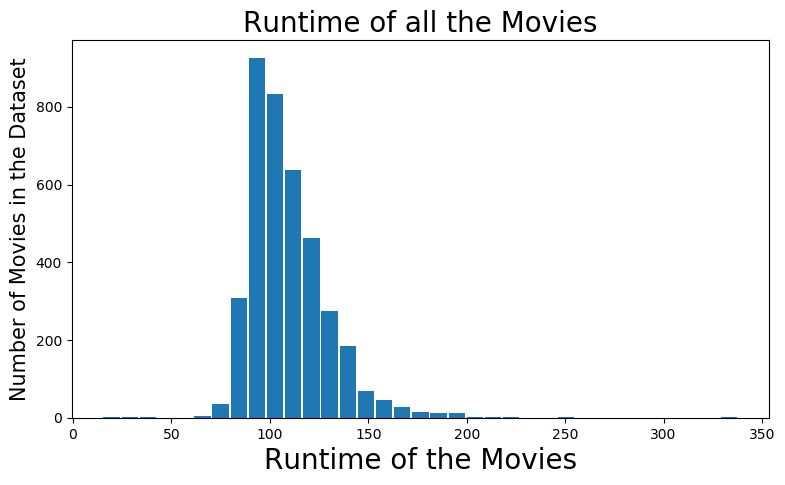

In [26]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 20)
#On y-axis 
plt.ylabel('Number of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the Movies', fontsize=20)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

The above formed graph is positively skewed and most of the movies have average time is between the 75 to 120

### Lets analyse the data using box model

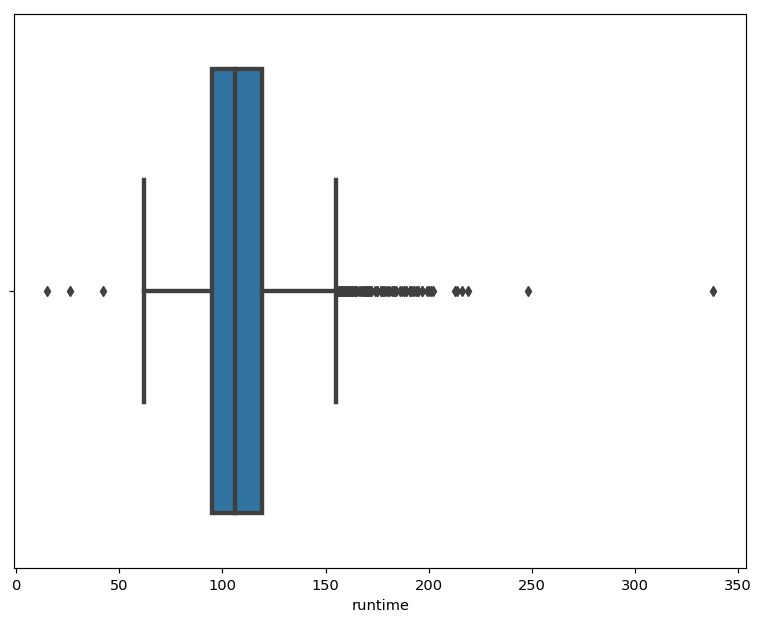

In [27]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(df['runtime'], linewidth = 3)
#diplaying the plot
plt.show()

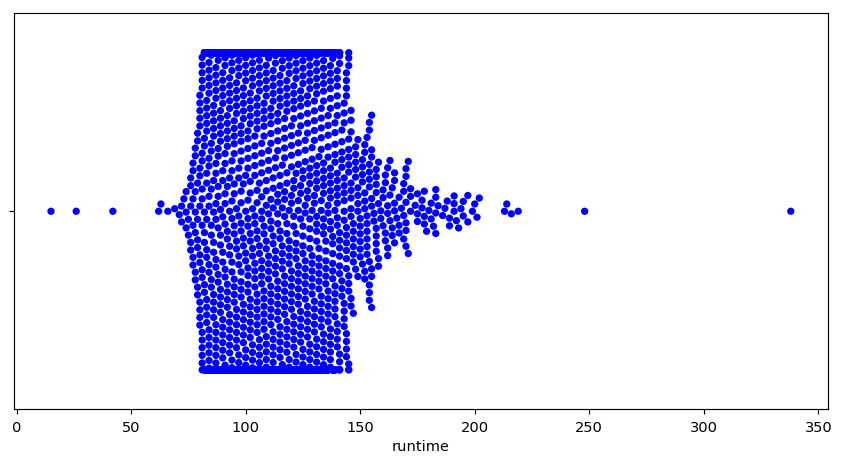

In [28]:
#The Second plots is the data points plot of runtime of movies

plt.figure(figsize=(10,5), dpi = 105)
#using seaborn to generate the plot
sns.swarmplot(df['runtime'], color = 'Blue')
#displaying the plot
plt.show()



By looking at both the plot and calculations, we can conclude that..

25% of movies have a runtime of less than 95 minutes.
50% of movies have a runtime of less than 109 minutes.
75% of movies have a runtime of less than 119 minutes.

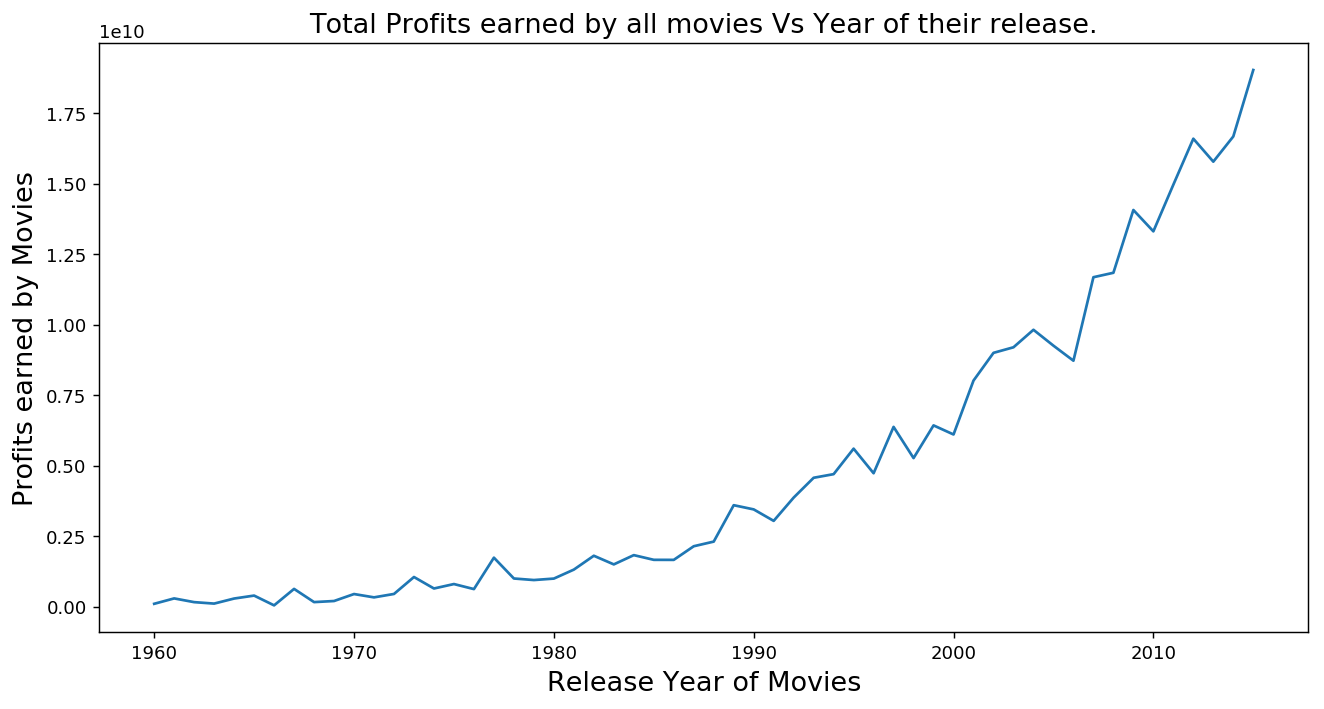

In [29]:
profits_year = df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies', fontsize = 15)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 15)
#title of the line plot
plt.title('Total Profits earned by all movies Vs Year of their release.', fontsize = 15)

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [30]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

So after visualisation it on the graph we get the 2015 is the year when it get most profit

In [31]:
#selecting the movies having profit $60M or more
profit_data = df[df['profit'] >= 60000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(1)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


In [32]:
#counting the no.of rows in the new data base
len(profit_data)

1197

So number of movies havw profit greater than $60M is 1197. 

### Successful genres

In [106]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [107]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Comedy       434
Action       426
Drama        419
Thriller     358
Adventure    348
dtype: int64

#### Graphical analysis of the  collected data

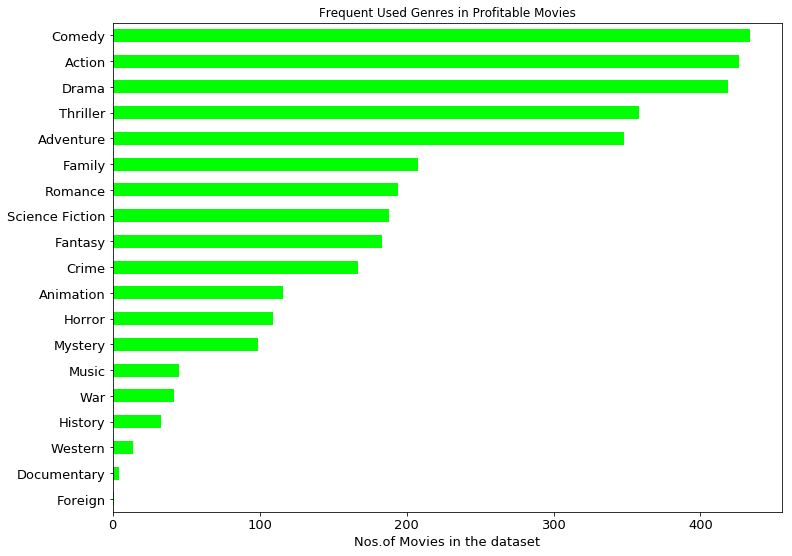

In [108]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

### Most number of  cast

In [109]:

#variable to store the retured value
count = data('cast')
#printing top 5 values
count.head()

Tom Cruise            26
Brad Pitt             22
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

Now the most number of movies by Tom Cruise i.e 26 and after that Brad Pitt 22 and Tom Hanks 22.

### Average budget of the movies

In [110]:
#New function to find average 
def profit_avg(column):
    return profit_data[column].mean()

In [111]:
# calling the above function for budget
profit_avg('budget')

63757867.395154551

The movies having profit of more than 50 million dollar have an average budget of 60 million dollar.

In [112]:
# calling the above function for revenue
profit_avg('revenue')

274739298.8086884

The movies having profit of more than 50 million dollar have an average revenue of 255 million dollar.

In [113]:
# calling the above function for 
profit_avg('runtime')

114.06850459482038

The movies having profit of more than 50 million dollar have an average duration of 113 minutes.

<a id='conclusions'></a>
## Conclusions

In this data analysis we observe the following.   
1)Average budget,revenue, profit of the movies is .    
2)Average Duration of the movie is 114 min.    
3)Which type of cast is most famous among the people.    
4)Most genres of movie is Adventure,action, thriller,Drama, comedy.    
